In [23]:
# imports
import numpy as np
import random
import math
import timeit
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from pylab import *

In [24]:
def read_error_from_file(filename):
    with open(filename, 'r') as fp:
        s = fp.readlines()
    return np.array([e.strip() for e in s], dtype='float')


In [25]:
from matplotlib import rc
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["mathtext.fontset"] = "cm"

In [26]:
err_L4_T1_S1 = read_error_from_file('L4_T1_S1_sizes_errors.txt')
err_L4_T1_S2 = read_error_from_file('L4_T1_S2_sizes_errors.txt')
err_L4_T1_S3 = read_error_from_file('L4_T1_S3_sizes_errors.txt')
err_L4_T2_S1 = read_error_from_file('L4_T2_S1_sizes_errors.txt')
err_L4_T2_S2 = read_error_from_file('L4_T2_S2_sizes_errors.txt')
err_L4_T2_S3 = read_error_from_file('L4_T2_S3_sizes_errors.txt')
err_L4_T3_S1 = read_error_from_file('L4_T3_S1_sizes_errors.txt')
err_L4_T3_S2 = read_error_from_file('L4_T3_S2_sizes_errors.txt')
err_L4_T3_S3 = read_error_from_file('L4_T3_S3_sizes_errors.txt')

In [27]:
err_L8_T1_S1 = read_error_from_file('L8_T1_S1_sizes_errors.txt')
err_L8_T1_S2 = read_error_from_file('L8_T1_S2_sizes_errors.txt')
err_L8_T1_S3 = read_error_from_file('L8_T1_S3_sizes_errors.txt')
err_L8_T2_S1 = read_error_from_file('L8_T2_S1_sizes_errors.txt')
err_L8_T2_S2 = read_error_from_file('L8_T2_S2_sizes_errors.txt')
err_L8_T2_S3 = read_error_from_file('L8_T2_S3_sizes_errors.txt')
err_L8_T3_S1 = read_error_from_file('L8_T3_S1_sizes_errors.txt')
err_L8_T3_S2 = read_error_from_file('L8_T3_S2_sizes_errors.txt')
err_L8_T3_S3 = read_error_from_file('L8_T3_S3_sizes_errors.txt')

In [28]:
x=np.array([12, 25, 49, 98, 195, 390, 781, 1562, 3125, 6250, 12500, 25000], dtype='int')
x=np.flip(x)
print(x)

[25000 12500  6250  3125  1562   781   390   195    98    49    25    12]


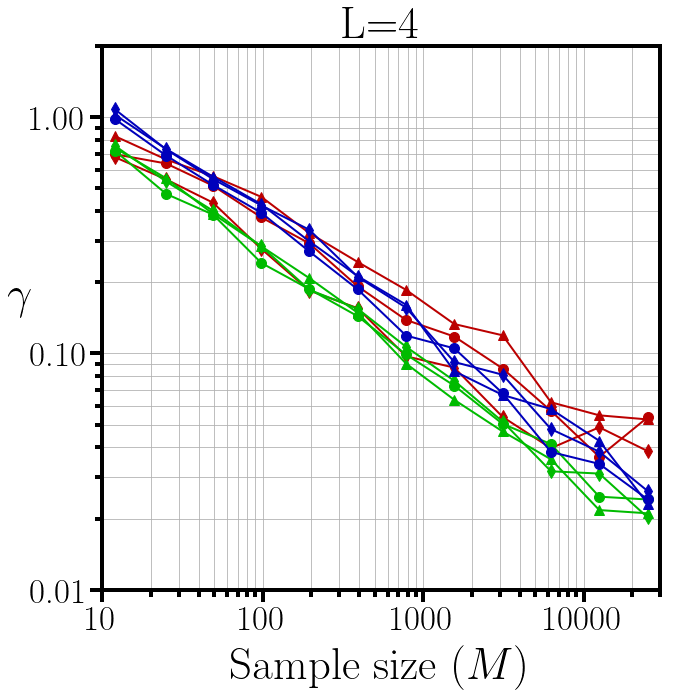

In [34]:
from scipy.interpolate import make_interp_spline, BSpline
mk_size=10
l_w=2
color1, color2, color3 = '#bb0000', '#00bb00', '#0000bb'
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title(r'L=4', fontsize=45, y=1.005)
plt.xlabel(r'Sample size ($M$)', rotation=0, fontsize=45)
plt.ylabel(r'$\gamma$', rotation=0, fontsize=45)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.plot(x, err_L4_T1_S1, color=color1, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T1_S2, color=color1, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T1_S3, color=color1, marker="^", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T2_S1, color=color2, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T2_S2, color=color2, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T2_S3, color=color2, marker="^", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T3_S1, color=color3, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T3_S2, color=color3, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L4_T3_S3, color=color3, marker="^", ms=mk_size, linewidth=l_w)

plt.ylim(1e-2, 2)
plt.xlim(10, 30000)
plt.yscale('log')
plt.xscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
#ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
#ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=7)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
#plt.legend()
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.grid(True, which='both')
plt.savefig('error_L4_samples.png', bbox_inches = 'tight')
plt.show()



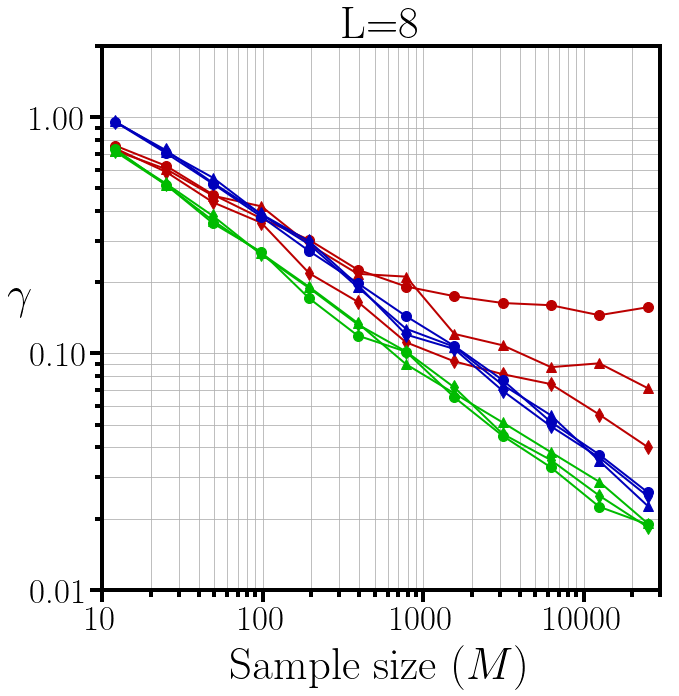

In [35]:
from scipy.interpolate import make_interp_spline, BSpline


color1, color2, color3 = '#bb0000', '#00bb00', '#0000bb'
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.title(r'L=8', fontsize=45, y=1.005)
plt.xlabel(r'Sample size ($M$)', rotation=0, fontsize=45)
plt.ylabel(r'$\gamma$', rotation=0, fontsize=45)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.plot(x, err_L8_T1_S1, color=color1, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T1_S2, color=color1, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T1_S3, color=color1, marker="^", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T2_S1, color=color2, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T2_S2, color=color2, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T2_S3, color=color2, marker="^", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T3_S1, color=color3, marker="o", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T3_S2, color=color3, marker="d", ms=mk_size, linewidth=l_w)
plt.plot(x, err_L8_T3_S3, color=color3, marker="^", ms=mk_size, linewidth=l_w)

plt.ylim(1e-2, 2)
plt.xlim(10, 30000)
plt.yscale('log')
plt.xscale('log')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
#ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# For the minor ticks, use no labels; default NullFormatter.
#ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=12)
ax.tick_params(which='minor', length=7)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
#plt.legend()
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
plt.grid(True, which='both')
plt.savefig('error_L8_samples.png', bbox_inches = 'tight')
plt.show()



In [36]:
from skimage import io, exposure, color, img_as_float, img_as_int, img_as_uint, img_as_ubyte
image1 = io.imread('error_L4_samples.png')
image2 = io.imread('error_L8_samples.png')
print(image1.shape)
print(image2.shape)
def two_images(img1, img2, savename):
    io.imsave(savename, np.hstack((img1, img2)))
two_images(image1, image2, 'error_joined_samples.png')

(696, 679, 4)
(696, 679, 4)
